In [2]:
import pandas as pd
df1=pd.read_csv('./grouped_data5.csv')
df1

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,119839.69,zero,2853.325952,0.000000,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,2044.094146,83807.860000,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,3801.447619,19957.600000,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,119839.69,zero,3072.812564,0.000000,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,2918.856279,62755.410000,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,119839.69,zero,3072.812564,0.000000,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,1639.131714,5736.961000,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,119839.69,zero,3328.880278,0.000000,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,1787.507381,25025.103333,2,1,46444.260,0,92888.52,high,1


In [3]:
df1['balance'].value_counts()

balance
119839.69    3618
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
112687.69       1
108698.96       1
238387.56       1
111833.47       1
130142.79       1
Name: count, Length: 6381, dtype: int64

In [4]:
df1['tenure'].value_counts()

tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [5]:
df1=df1.drop('balance_per_tenure',axis=1)

In [6]:
df1

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,2,119839.69,zero,2853.325952,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,1,83807.86,rest,2044.094146,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,8,159660.80,rest,3801.447619,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,1,119839.69,zero,3072.812564,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,2,125510.82,rest,2918.856279,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,5,119839.69,zero,3072.812564,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,10,57369.61,rest,1639.131714,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,7,119839.69,zero,3328.880278,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,3,75075.31,rest,1787.507381,2,1,46444.260,0,92888.52,high,1


In [7]:
# tenure의 데이터값을 0에서 10이 아닌 1에서 11로 바꾼다
# 그리고 해석을 1년 보유가 아니라 1년 이내 보유 이런식으로 한다

df1['tenure']=df1['tenure']+1

In [8]:
df1['tenure'].unique()

array([ 3,  2,  9,  8,  5,  7,  4, 11,  6, 10,  1], dtype=int64)

In [9]:
df1

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,3,119839.69,zero,2853.325952,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,2,83807.86,rest,2044.094146,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,9,159660.80,rest,3801.447619,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,2,119839.69,zero,3072.812564,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,3,125510.82,rest,2918.856279,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,6,119839.69,zero,3072.812564,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,11,57369.61,rest,1639.131714,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,8,119839.69,zero,3328.880278,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,4,75075.31,rest,1787.507381,2,1,46444.260,0,92888.52,high,1


In [10]:
df1['balance_per_tenure'] = df1['balance'] / df1['tenure']

df1.insert(df1.columns.get_loc('balance_per_age') + 1,
              'balance_per_tenure',
              df1.pop('balance_per_tenure'))

In [11]:
df1

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,3,119839.69,zero,2853.325952,39946.563333,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,2,83807.86,rest,2044.094146,41903.930000,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,9,159660.80,rest,3801.447619,17740.088889,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,2,119839.69,zero,3072.812564,59919.845000,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,3,125510.82,rest,2918.856279,41836.940000,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,6,119839.69,zero,3072.812564,19973.281667,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,11,57369.61,rest,1639.131714,5215.419091,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,8,119839.69,zero,3328.880278,14979.961250,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,4,75075.31,rest,1787.507381,18768.827500,2,1,46444.260,0,92888.52,high,1


In [12]:
df1.groupby('balance').count()['churn']

balance
3768.69      1
12459.19     1
14262.80     1
16893.59     1
23503.31     1
            ..
216109.88    1
221532.80    1
222267.63    1
238387.56    1
250898.09    1
Name: churn, Length: 6381, dtype: int64

In [13]:
df1['balance'].value_counts()

balance
119839.69    3618
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
112687.69       1
108698.96       1
238387.56       1
111833.47       1
130142.79       1
Name: count, Length: 6381, dtype: int64

In [14]:
df1['balance_per_tenure'].value_counts()

balance_per_tenure
14979.961250    386
39946.563333    382
19973.281667    374
23967.938000    369
17119.955714    367
               ... 
37562.563333      1
36232.986667      1
59596.890000      1
13979.183750      1
26028.558000      1
Name: count, Length: 6393, dtype: int64

In [15]:
len(df1.columns)

19

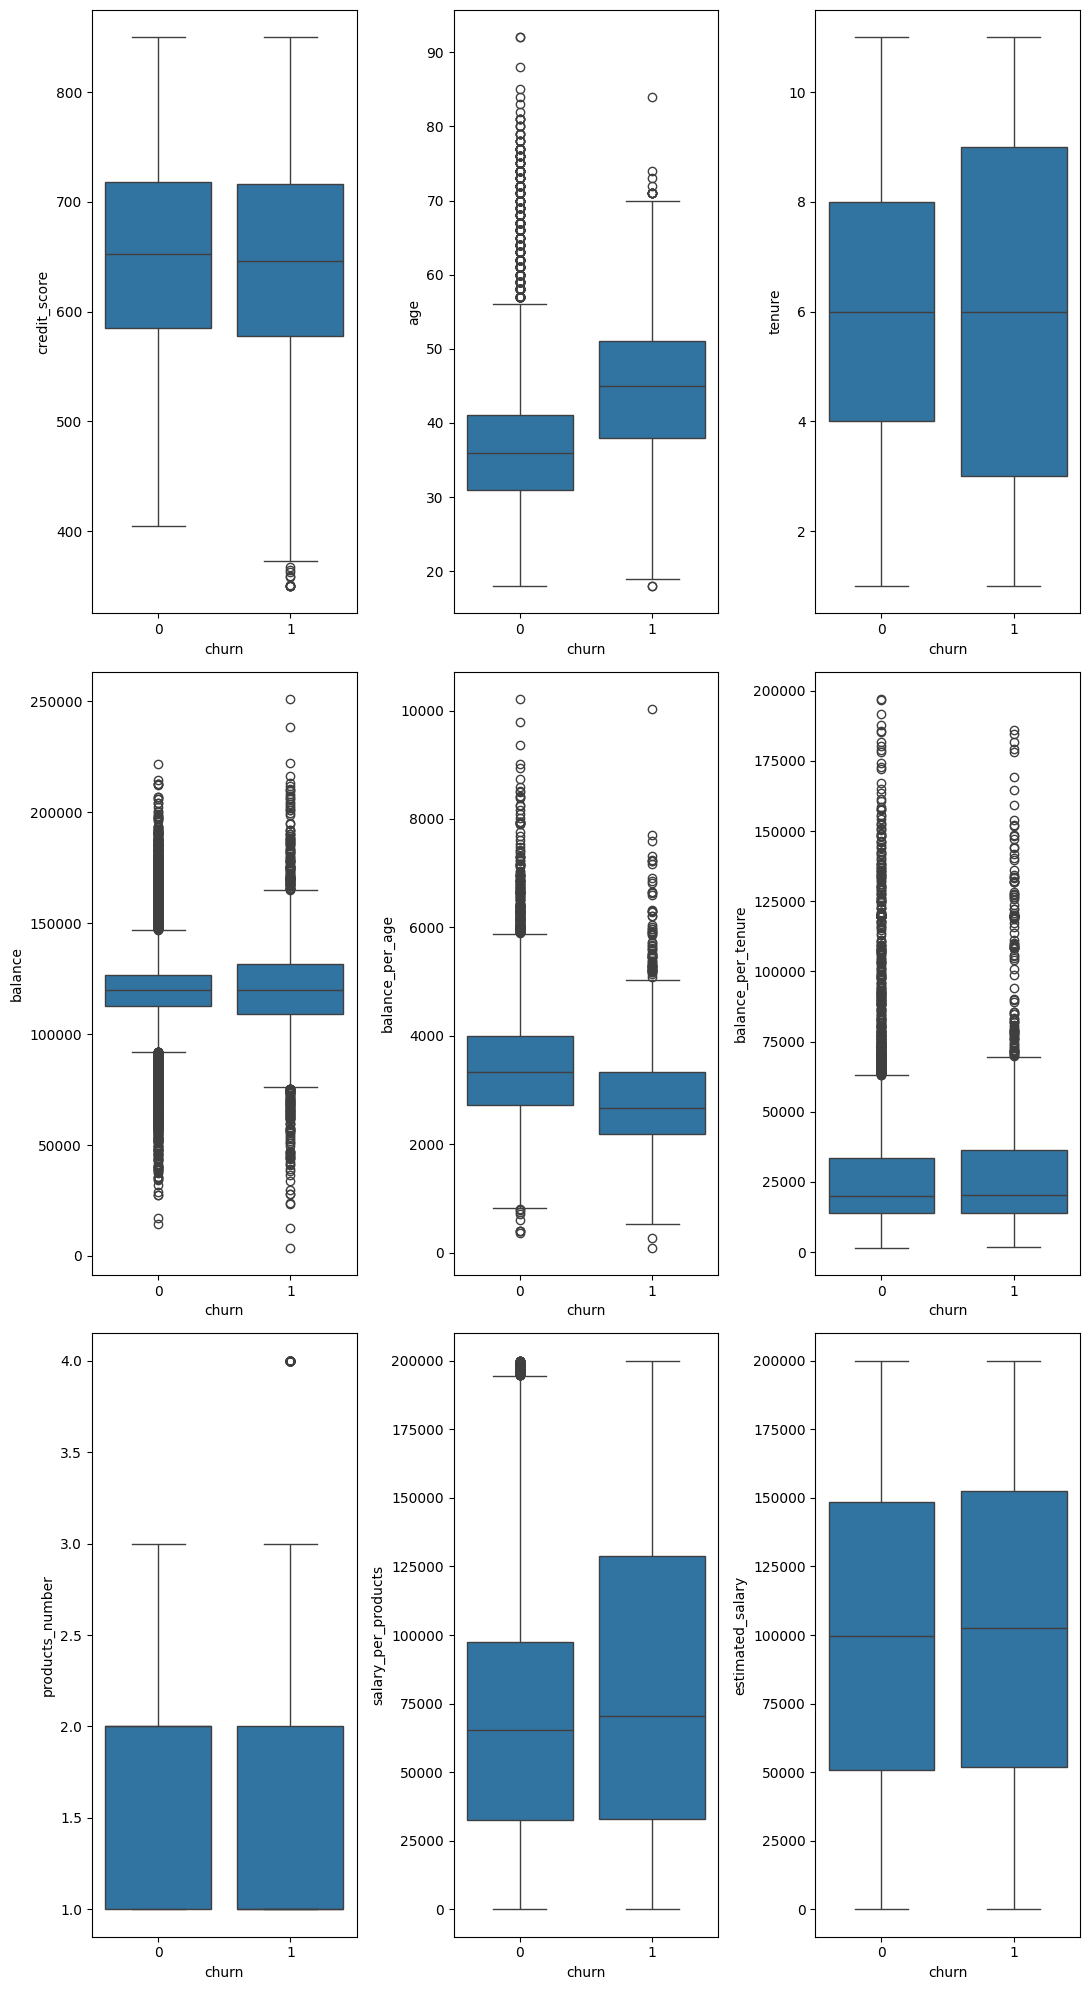

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# y값 리스트
y_vars = ['credit_score','age','tenure','balance',
          'balance_per_age', 'balance_per_tenure', 'products_number',
          'salary_per_products','estimated_salary']

# subplot 설정
plt.figure(figsize=(11,20))

for i, y_var in enumerate(y_vars):
    plt.subplot(3,3, i + 1)
    sns.boxplot(x='churn', y=y_var, data=df1)
    plt.xlabel('churn')
    plt.ylabel(y_var)
    # plt.title(f'Distribution of {y_var} by churn')

plt.tight_layout()
plt.show()

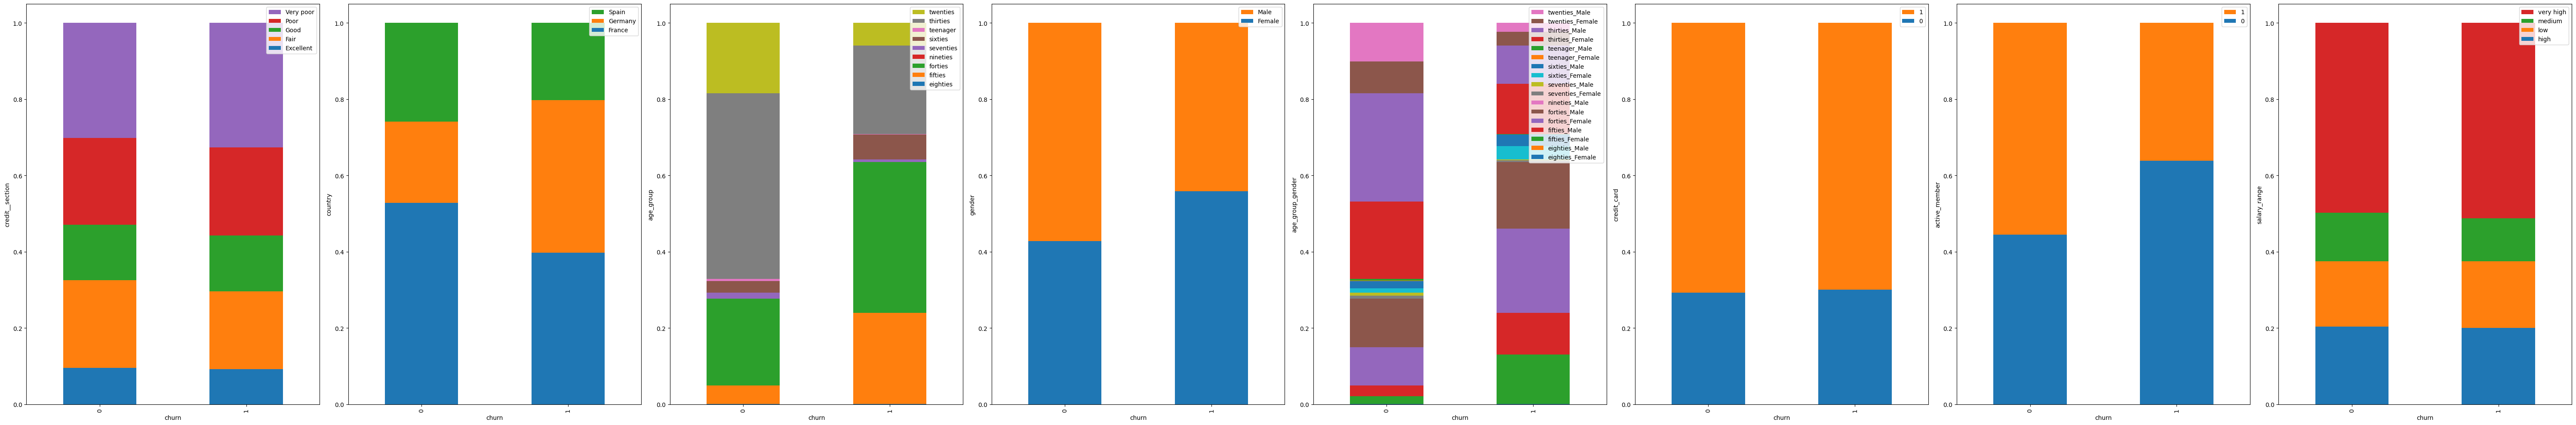

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Index(['credit_score', 'credit__section', 'country', 'age', 'age_group',
#        'gender', 'age_group_gender', 'tenure', 'balance', 'balance_group',
#        'balance_per_age', 'balance_per_tenure', 'products_number',
#        'credit_card', 'salary_per_products', 'active_member',
#        'estimated_salary', 'salary_range', 'churn'],
#       dtype='object')

# 변수형 독립 변수 리스트
independent_vars = ['credit__section', 'country', 'age_group','gender',
                    'age_group_gender','credit_card',
                    'active_member', 'salary_range']

# subplot 설정
plt.figure(figsize=(60, 10))

for i, var in enumerate(independent_vars):
    plt.subplot(1,8, i + 1)
    
    # 크로스탭을 사용하여 스택형 비율 계산
    crosstab = pd.crosstab(df1['churn'], df1[var], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca()
                #   color=['skyblue', 'orange']
                  )
    
    # plt.title(f'Stacked Bar Plot of {var} by Dependent Variable')
    plt.ylabel(var)
    plt.xlabel('churn')
    # plt.legend(title='churn', loc='upper right')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(reversed(handles), reversed(labels),
              #  title='churn',
               loc='upper right')

plt.tight_layout()
plt.show()

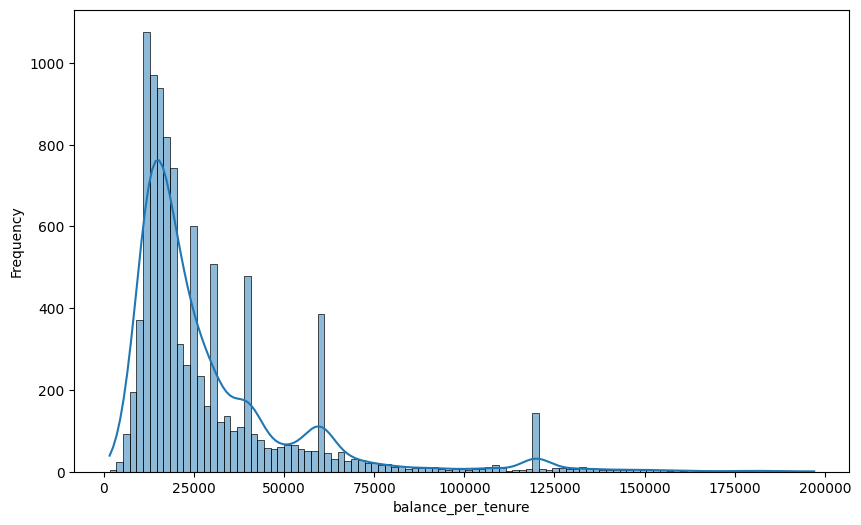

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df1['balance_per_tenure'], kde=True)
# plt.title('Distribution of Data (excluding 0)')
plt.xlabel('balance_per_tenure')
plt.ylabel('Frequency')
plt.show()

In [19]:
csv_filename = 'grouped_data5-1.csv'
df1.to_csv(csv_filename, index=False)

# drop columns

In [20]:
df=pd.read_csv('grouped_data5-1.csv')
df

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,3,119839.69,zero,2853.325952,39946.563333,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,2,83807.86,rest,2044.094146,41903.930000,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,9,159660.80,rest,3801.447619,17740.088889,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,2,119839.69,zero,3072.812564,59919.845000,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,3,125510.82,rest,2918.856279,41836.940000,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,6,119839.69,zero,3072.812564,19973.281667,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,11,57369.61,rest,1639.131714,5215.419091,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,8,119839.69,zero,3328.880278,14979.961250,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,4,75075.31,rest,1787.507381,18768.827500,2,1,46444.260,0,92888.52,high,1


In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mutual_info_score

categorical_columns = df.select_dtypes(include=['category'])

# 범주형 변수 인코딩
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 엔트로피 계산 함수
def entropy(y):
    proportions = y.value_counts(normalize=True)
    return -np.sum(proportions * np.log2(proportions))

# 정보 이득 계산 함수
def information_gain(df, feature, target):
    total_entropy = entropy(df[target])
    feature_values = df[feature].unique()
    
    weighted_entropy = 0
    for value in feature_values:
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset[target])
    
    return total_entropy - weighted_entropy

# 각 칼럼에 대한 정보 이득 계산
target = 'churn'
for feature in df.columns:
    if feature != target:
        ig = information_gain(df, feature, target)
        # print(f'Information Gain of {feature} with respect to {target}: {ig}')
        print(f"'{feature}':{ig}")

'credit_score':0.038547012884779575
'credit__section':0.0006065068745300106
'country':0.020222322423849803
'age':0.10721551580707478
'age_group':0.08887078499166601
'gender':0.008154397807196179
'age_group_gender':0.09664136838137116
'tenure':0.0010139452215386369
'balance':0.5191397545967105
'balance_group':0.011307710863572629
'balance_per_age':0.5539961051430762
'balance_per_tenure':0.5203354391555166
'products_number':0.10092156424028342
'credit_card':3.6636757529517894e-05
'salary_per_products':0.7292666572167683
'active_member':0.01773286854203171
'estimated_salary':0.7292666572167683
'salary_range':0.00025850396979343326


In [22]:
# 딕셔너리 생성
example_dict = {
    'credit_score':0.038547012884779575,
'credit__section':0.0006065068745300106,
'country':0.020222322423849803,
'age':0.10721551580707478,
'age_group':0.08887078499166601,
'gender':0.008154397807196179,
'age_group_gender':0.09664136838137116,
'tenure':0.0010139452215386369,
'balance':0.5191397545967105,
'balance_per_age':0.5539961051430762,
'balance_per_tenure':0.5203354391555166,
'products_number':0.10092156424028342,
'credit_card':3.6636757529517894e-05,
'salary_per_products':0.7292666572167683,
'active_member':0.01773286854203171,
'estimated_salary':0.7292666572167683,
'salary_range':0.00025850396979343326,
}

# 벨류값에 따라 딕셔너리 정렬
sorted_items = sorted(example_dict.items(), key=lambda item: item[1],reverse=True)

# 정렬된 결과를 깔끔하게 출력
for key, value in sorted_items:
    print(f'{key:21} {value:.5f}')

salary_per_products   0.72927
estimated_salary      0.72927
balance_per_age       0.55400
balance_per_tenure    0.52034
balance               0.51914
age                   0.10722
products_number       0.10092
age_group_gender      0.09664
age_group             0.08887
credit_score          0.03855
country               0.02022
active_member         0.01773
gender                0.00815
tenure                0.00101
credit__section       0.00061
salary_range          0.00026
credit_card           0.00004


In [23]:
df=df.drop(['credit_score','age','age_group','gender',
        'balance','products_number',
        'credit_card','estimated_salary'],axis=1)
df

,credit__section,country,age_group_gender,tenure,balance_group,balance_per_age,balance_per_tenure,salary_per_products,active_member,salary_range,churn
0,Poor,France,forties_Female,3,zero,2853.325952,39946.563333,101348.880,1,very high,1
1,Poor,Spain,forties_Female,2,rest,2044.094146,41903.930000,112542.580,1,very high,0
2,Very poor,France,forties_Female,9,rest,3801.447619,17740.088889,37977.190,0,very high,1
3,Fair,France,thirties_Female,2,zero,3072.812564,59919.845000,46913.315,0,high,0
4,Excellent,Spain,forties_Female,3,rest,2918.856279,41836.940000,79084.100,1,high,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Good,France,thirties_Male,6,zero,3072.812564,19973.281667,48135.320,0,high,0
9996,Very poor,France,thirties_Male,11,rest,1639.131714,5215.419091,101699.770,1,very high,0
9997,Fair,France,thirties_Female,8,zero,3328.880278,14979.961250,42085.580,1,medium,1
9998,Good,Germany,forties_Male,4,rest,1787.507381,18768.827500,46444.260,0,high,1


In [24]:
df.shape

(10000, 11)

# 각 독립 변수의 분포를 종속 변수 값에 따라 확인하기

In [25]:
df.columns

Index(['credit__section', 'country', 'age_group_gender', 'tenure',
       'balance_group', 'balance_per_age', 'balance_per_tenure',
       'salary_per_products', 'active_member', 'salary_range', 'churn'],
      dtype='object')

In [26]:
df['tenure'].value_counts()

tenure
3     1048
2     1035
8     1028
9     1025
6     1012
4     1009
5      989
10     984
7      967
11     490
1      413
Name: count, dtype: int64

In [37]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # y값 리스트
# y_vars = ['balance_per_age', 'balance_per_tenure', 'salary_per_products','tenure']

# # subplot 설정
# plt.figure(figsize=(12, 10))

# for i, y_var in enumerate(y_vars):
#     plt.subplot(1,4, i + 1)
#     sns.boxplot(x='churn', y=y_var, data=df)
#     plt.xlabel('churn')
#     plt.ylabel(y_var)
#     # plt.title(f'Distribution of {y_var} by churn')

# plt.tight_layout()
# plt.show()

In [28]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 변수형 독립 변수 리스트
# independent_vars = ['credit__section', 'country', 'age_group_gender', 'tenure',
#                     'active_member', 'salary_range']

# # subplot 설정
# plt.figure(figsize=(13,30))

# for i, var in enumerate(independent_vars):
#     plt.subplot(6, 1, i + 1)
#     # subplot(nrows, ncols, index, **kwargs)
#     sns.countplot(x=var, hue='churn', data=df)
#     # plt.title(f'Count of {var} by Dependent Variable')
#     plt.xlabel(var)
#     plt.xticks(rotation=45)
#     plt.ylabel('Count')

# plt.tight_layout()
# plt.show()


In [38]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # 변수형 독립 변수 리스트
# independent_vars = ['credit__section', 'country', 'age_group_gender', 'tenure',
#                     'active_member', 'salary_range']

# # subplot 설정
# plt.figure(figsize=(11, 45))

# for i, var in enumerate(independent_vars):
#     plt.subplot(6, 1, i + 1)
    
#     # 크로스탭을 사용하여 스택형 비율 계산
#     crosstab = pd.crosstab(df['churn'], df[var], normalize='index')
#     crosstab.plot(kind='bar', stacked=True, ax=plt.gca()
#                 #   color=['skyblue', 'orange']
#                   )
    
#     # plt.title(f'Stacked Bar Plot of {var} by Dependent Variable')
#     plt.ylabel(var)
#     plt.xlabel('churn')
#     # plt.legend(title='churn', loc='upper right')
#     handles, labels = plt.gca().get_legend_handles_labels()
#     plt.legend(reversed(handles), reversed(labels), title='churn', loc='upper right')

# plt.tight_layout()
# plt.show()


In [30]:
df.rename(columns={'credit__section':'credit_section'},inplace=True)

In [31]:
df.columns

Index(['credit_section', 'country', 'age_group_gender', 'tenure',
       'balance_group', 'balance_per_age', 'balance_per_tenure',
       'salary_per_products', 'active_member', 'salary_range', 'churn'],
      dtype='object')

In [32]:
# 이상치가 많은 불균형 데이터가 있다 
# 로그 변환을 한다
# 그런데 모든 수치형에 해야 할까 vs 이상치가 많은 변수에만 해야 할까
# 데이터가 전반적으로 비선형 관계일 경우, 전체 로그 변환을 한다
# 원본 데이터셋에서의 변경 사항이 많으니 다시 산점도를 그려서 비선형 관계를 확인한다

# 비선형 관계 확인

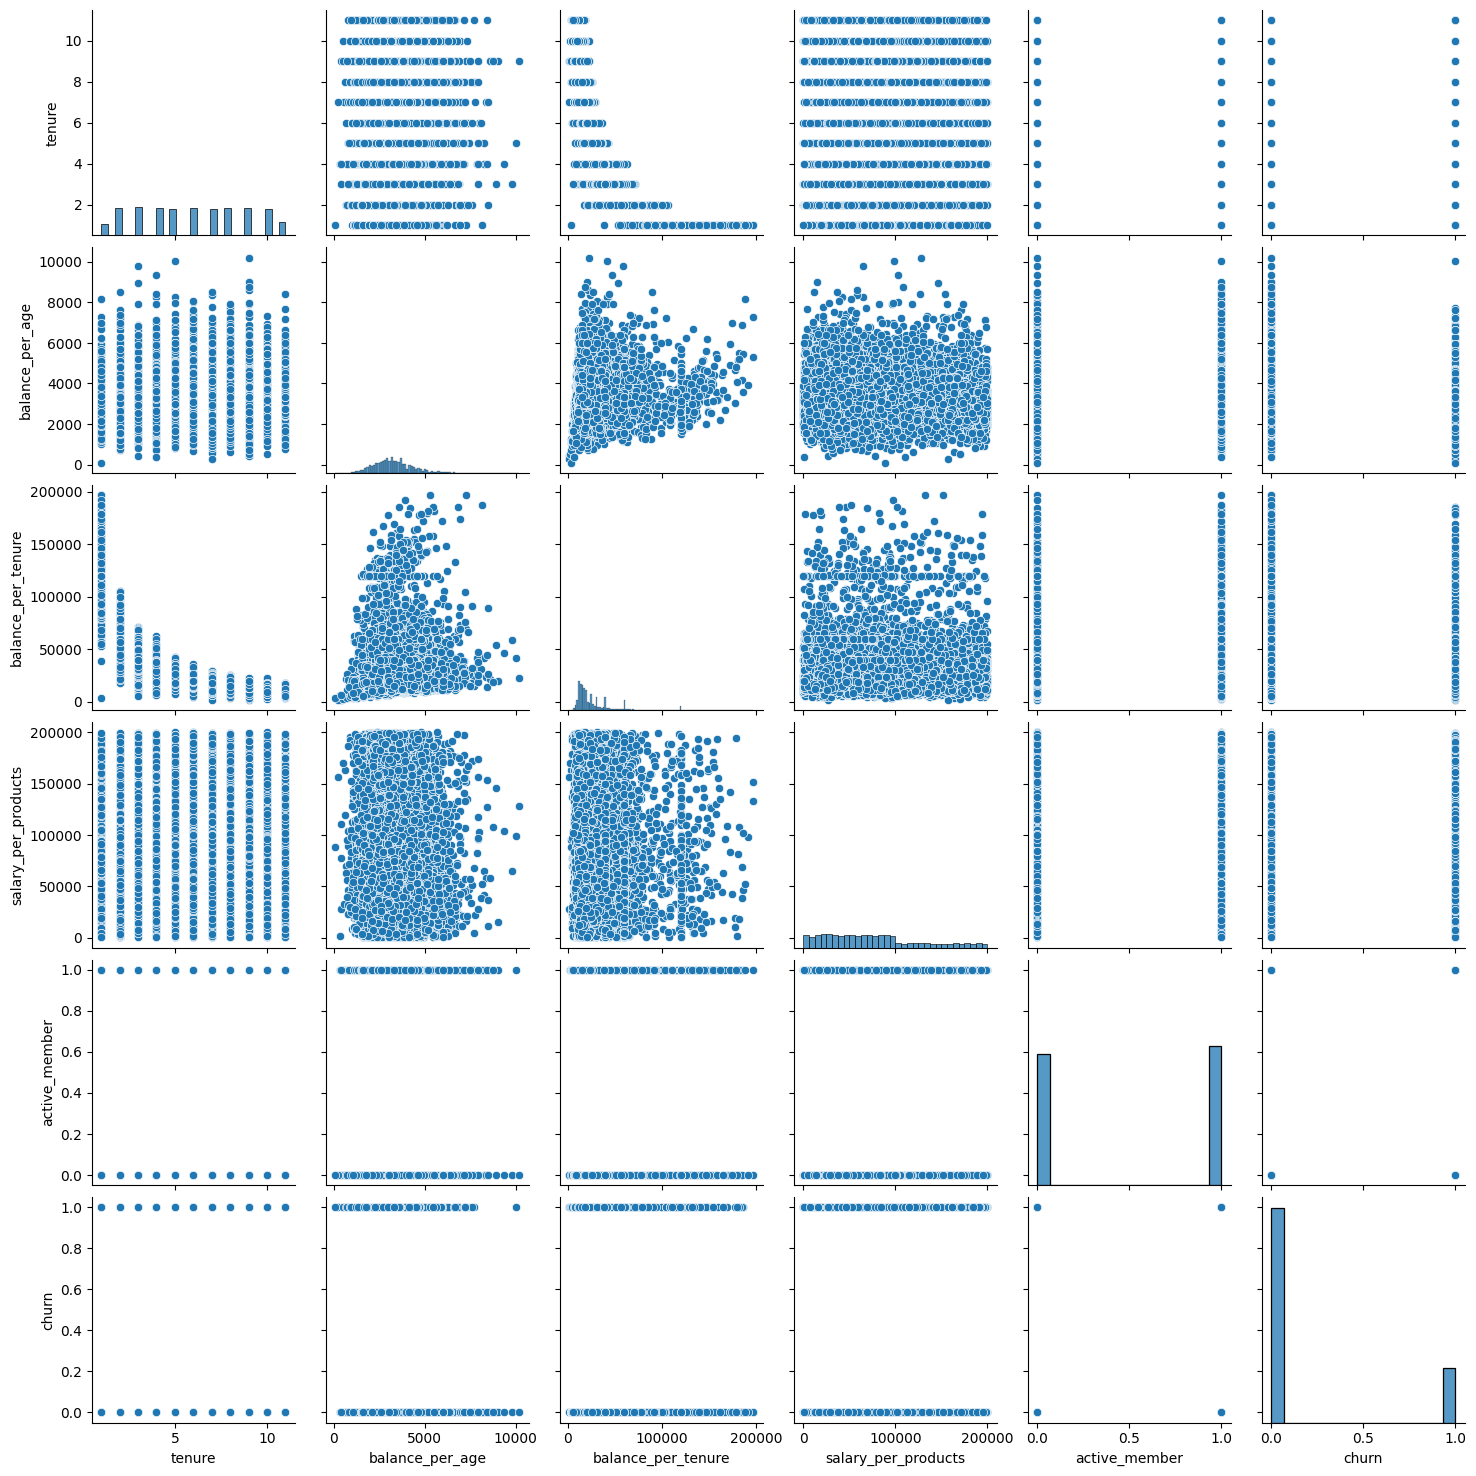

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['credit_section', 'country', 'age_group_gender', 'tenure',
       'balance_per_age', 'balance_per_tenure', 'salary_per_products',
       'active_member', 'salary_range', 'churn']

# 페어플롯 그리기
# **페어플롯(pairplot)**은 산점도의 모음입니다.
# 페어플롯은 여러 변수 간의 관계를 한 번에 시각화할 수 있는 매우 유용한 도구로,
# seaborn 라이브러리에서 제공하는 기능입니다.
sns.pairplot(df[variables])
plt.show()

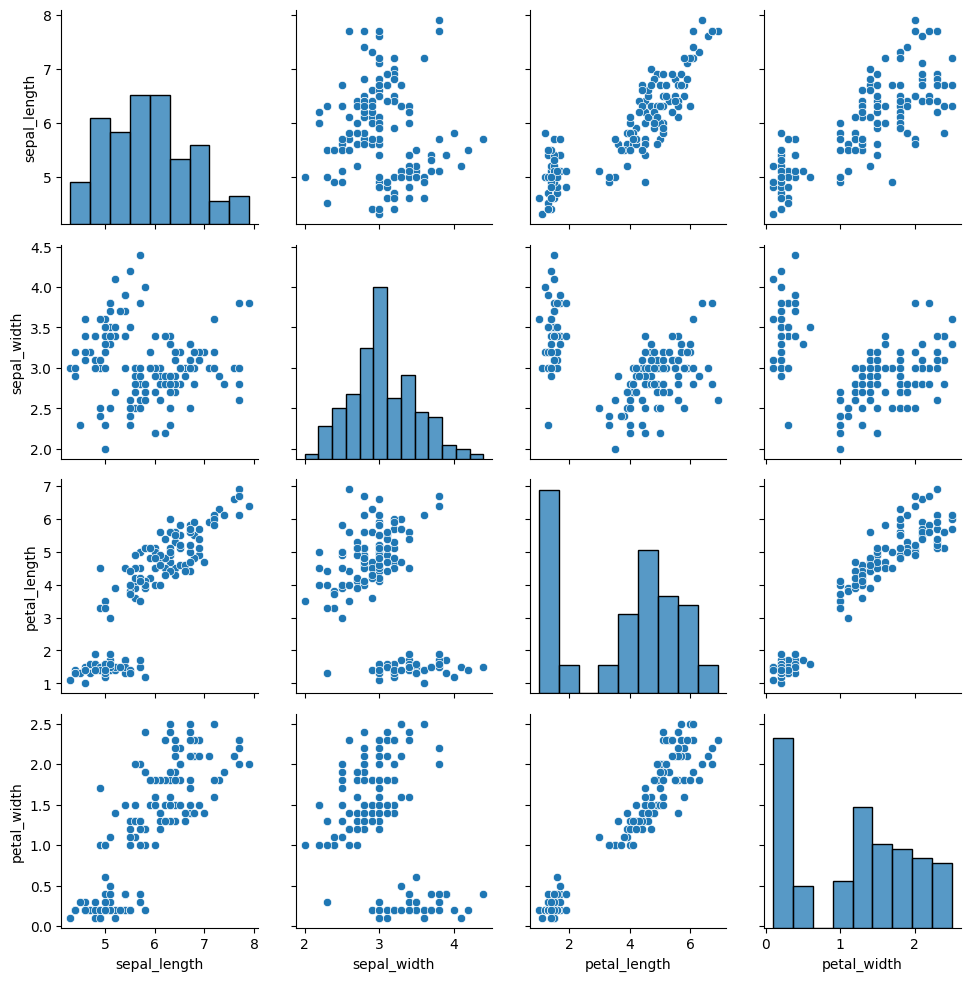

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 예시 데이터셋 로드 (예: iris 데이터셋 사용)
df = sns.load_dataset('iris')
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# PairGrid 설정
g = sns.PairGrid(df, vars=continuous_vars)
g = g.map_upper(sns.scatterplot)  # 상삼각형 영역에 산점도
g = g.map_lower(sns.scatterplot)  # 하삼각형 영역에 산점도
g = g.map_diag(sns.histplot)  # 대각선에 히스토그램 대신 아무 것도 넣지 않음
plt.show()

In [35]:
# 비선형 관계같은건 없어보인다
# 독립적인 관계
# 이상치가 지나친 변수만 로그 변환을 한다

# one hot encoding

In [36]:
df_encoded=pd.get_dummies(df,columns=['credit_section','country',
                                      'age_group_gender','salary_range'])
df_encoded=df_encoded.astype(int)
df_encoded

KeyError: "None of [Index(['credit_section', 'country', 'age_group_gender', 'salary_range'], dtype='object')] are in the [columns]"

In [ ]:
df_encoded.columns

Index(['tenure', 'balance_per_age', 'balance_per_tenure',
       'salary_per_products', 'active_member', 'churn',
       'credit_section_Excellent', 'credit_section_Fair',
       'credit_section_Good', 'credit_section_Poor',
       'credit_section_Very poor', 'country_France', 'country_Germany',
       'country_Spain', 'age_group_gender_eighties_Female',
       'age_group_gender_eighties_Male', 'age_group_gender_fifties_Female',
       'age_group_gender_fifties_Male', 'age_group_gender_forties_Female',
       'age_group_gender_forties_Male', 'age_group_gender_nineties_Male',
       'age_group_gender_seventies_Female', 'age_group_gender_seventies_Male',
       'age_group_gender_sixties_Female', 'age_group_gender_sixties_Male',
       'age_group_gender_teenager_Female', 'age_group_gender_teenager_Male',
       'age_group_gender_thirties_Female', 'age_group_gender_thirties_Male',
       'age_group_gender_twenties_Female', 'age_group_gender_twenties_Male',
       'salary_range_high', 'sala

In [ ]:
df_encoded['age_group_gender_forties_Male'].value_counts()

age_group_gender_forties_Male
0    8629
1    1371
Name: count, dtype: int64

In [ ]:
df.isin([0]).any()
# balance_per_tenure 에 0이 있다
# 계좌 잔액에서 0인 값들을 중앙값으로 대체한 적이 있다
# 혹시 결측치 처리 전에 파생변수를 만들어서 0이 많은건가

credit_section         False
country                False
age_group_gender       False
tenure                 False
balance_per_age        False
balance_per_tenure     False
salary_per_products    False
active_member           True
salary_range           False
churn                   True
dtype: bool

In [ ]:
df['balance_per_tenure'].value_counts()
# 0이 전체의 약 40퍼센트

balance_per_tenure
14979.961250    386
39946.563333    382
19973.281667    374
23967.938000    369
17119.955714    367
               ... 
37562.563333      1
36232.986667      1
59596.890000      1
13979.183750      1
26028.558000      1
Name: count, Length: 6393, dtype: int64

In [39]:
# 위의 오류는 결측치 처리한 변수를 활용해 파생 변수를 다시 만들어서 해결했다